In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
#from clim680_function import xyticks
import pymannkendall as mk
import pandas as pd
import time
import matplotlib.image as mpimg
stime=time.time()

In [2]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_total850_early.nc'
DS_dse_early=xr.open_dataset(f)
dse_early850_tot=DS_dse_early['__xarray_dataarray_variable__']
dse_early850_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-610638.56 , -642070.44 , -672483.7  , ...,  190859.9  ,  180617.72 ,
         172718.75 ],
       [-634108.56 , -668988.2  , -701999.4  , ...,  215982.6  ,  203578.72 ,
         193215.08 ],
       [-656652.94 , -693249.06 , -728418.4  , ...,  240693.44 ,  228635.47 ,
         216206.45 ],
       ...,
       [1437187.1  , 1313266.9  , 1329466.5  , ...,  190577.64 ,   13811.174,
         -22152.686],
       [1402567.4  , 1070964.5  ,  420221.75 , ...,  146922.6  ,   59365.12 ,
         -72594.805],
       [ 394414.97 ,  -58492.543,  359909.72 , ...,  -52422.51 ,  -52279.934,
         -72496.68 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [3]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_total850_late.nc'
DS_dse_late=xr.open_dataset(f)
dse_late850_tot=DS_dse_late['__xarray_dataarray_variable__']
dse_late850_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-702067.2  , -725041.8  , -745304.25 , ...,   94733.97 ,   81489.016,
          70146.34 ],
       [-731397.4  , -755616.56 , -777422.1  , ...,  118402.78 ,  104403.625,
          94089.164],
       [-759282.06 , -785919.06 , -810162.8  , ...,  143393.16 ,  129538.05 ,
         119840.73 ],
       ...,
       [1323341.1  , 1203497.4  , 1231150.2  , ...,  112327.21 ,  -62359.473,
         -93291.98 ],
       [1304127.1  ,  997400.9  ,  395232.22 , ...,   54574.645,  -21096.293,
        -142350.64 ],
       [ 392903.38 ,   67153.15 ,  208268.06 , ..., -177792.08 , -158192.05 ,
        -156599.36 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [4]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_trans850_early.nc'
DS_dse_early=xr.open_dataset(f)
dse_early850_trans=DS_dse_early['__xarray_dataarray_variable__']
dse_early850_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[  146.252239,   188.976243,   163.004022, ...,   380.455795,
          256.363983,   163.217305],
       [  240.596937,   316.753344,   329.933591, ...,   742.229442,
          498.26329 ,   378.668155],
       [  420.06294 ,   525.618892,   453.207366, ...,  1269.161453,
          990.290325,   763.701366],
       ...,
       [ 3277.828321,   915.667126,   925.10606 , ..., 10151.225167,
        11901.428016, 13974.775263],
       [ 2285.040137,  1402.670705,   927.440061, ...,  7402.246025,
         8431.546802, 10802.944837],
       [         nan,  1393.399192,          nan, ..., 13114.454783,
        10312.912305,  6271.501352]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    lev           float64 ...
    cutoffs       int64 ...
    coefficients  float64 ...

In [5]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_trans850_late.nc'
DS_dse_late=xr.open_dataset(f)
dse_late850_trans=DS_dse_early['__xarray_dataarray_variable__']
dse_late850_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[  146.252239,   188.976243,   163.004022, ...,   380.455795,
          256.363983,   163.217305],
       [  240.596937,   316.753344,   329.933591, ...,   742.229442,
          498.26329 ,   378.668155],
       [  420.06294 ,   525.618892,   453.207366, ...,  1269.161453,
          990.290325,   763.701366],
       ...,
       [ 3277.828321,   915.667126,   925.10606 , ..., 10151.225167,
        11901.428016, 13974.775263],
       [ 2285.040137,  1402.670705,   927.440061, ...,  7402.246025,
         8431.546802, 10802.944837],
       [         nan,  1393.399192,          nan, ..., 13114.454783,
        10312.912305,  6271.501352]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [7]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_totalearly850.nc'
DS_lh_early=xr.open_dataset(f)
lh_early850_tot=DS_lh_early['__xarray_dataarray_variable__']
lh_early850_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-17657.858059, -18155.124988, -18564.194944, ...,  10835.105525,
         10193.402711,   9710.525172],
       [-17932.720352, -18519.602884, -19031.321295, ...,  12157.126665,
         11404.32151 ,  10772.75536 ],
       [-18255.710751, -18839.160372, -19409.124609, ...,  13415.235886,
         12701.159902,  11962.208468],
       ...,
       [ 34318.206087,  31135.129444,  31026.461292, ...,   2297.961819,
           166.859386,   -271.294182],
       [ 32691.749316,  23766.91347 ,   8740.086411, ...,   1702.283506,
           698.459437,   -859.196188],
       [  8065.67465 ,  -1028.850997,   5242.280141, ...,   -574.566556,
          -584.476824,   -827.81385 ]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [8]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_totallate850.nc'
DS_lh_late=xr.open_dataset(f)
lh_late850_tot=DS_lh_late['__xarray_dataarray_variable__']
lh_late850_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-19396.74424 , -19416.318778, -19363.164436, ...,   5416.853447,
          4656.199533,   3998.838405],
       [-19823.368136, -19885.747768, -19874.350335, ...,   6696.50571 ,
          5897.415192,   5309.638651],
       [-20252.054725, -20336.562004, -20354.802106, ...,   8029.957432,
          7243.004707,   6690.912233],
       ...,
       [ 31899.99504 ,  28695.09805 ,  28861.525822, ...,   1476.910722,
          -824.745199,  -1251.074885],
       [ 30589.963831,  22280.517779,   8319.912641, ...,    691.865922,
          -272.229219,  -1852.702911],
       [  8135.082698,   1206.856688,   2614.14954 , ...,  -2142.043258,
         -1947.012192,  -1972.674438]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [9]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_early850.nc'
DS_lh_early=xr.open_dataset(f)
lh_early850_trans=DS_lh_early['__xarray_dataarray_variable__']
lh_early850_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 247.988022,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [ 272.43588 ,  223.101446,  233.055742, ...,  320.647589,  279.406866,
         208.971693],
       [ 340.081496,  241.949912,  203.193357, ...,  341.413903,  316.429812,
         234.880655],
       ...,
       [-588.858957, -187.167304,  426.249206, ..., 3895.673983, 3998.499497,
        4023.763512],
       [ 699.674344,  703.964557,  925.927729, ..., 3197.28319 , 3285.543176,
        3338.71976 ],
       [ 978.419443, 1047.637049, 1124.141918, ..., 2564.126787, 2707.924657,
        2834.20642 ]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [11]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_late850.nc'
DS_lh_late=xr.open_dataset(f)
lh_late850_trans=DS_lh_late['__xarray_dataarray_variable__']
lh_late850_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 424.617861,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [ 497.518257,  408.340928,  353.379919, ...,  537.743334,  526.788463,
         475.294041],
       [ 353.383583,  341.997252,  314.933639, ...,  526.597903,  515.569304,
         507.110436],
       ...,
       [-176.385077,  140.315338,  540.081367, ..., 3616.525762, 3733.186069,
        3859.285825],
       [ 888.160359,  889.065163, 1117.831708, ..., 2835.778587, 2948.315871,
        3105.21403 ],
       [1263.123447, 1362.069477, 1430.175239, ..., 2084.549803, 2233.004012,
        2457.838269]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [12]:
early_ratio_dse=dse_early850_trans/dse_early850_tot
late_ratio_dse=dse_late850_trans/dse_late850_tot
perc_change_dse850=(late_ratio_dse-early_ratio_dse)*100
perc_change_dse850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[ 2.12491323e-03,  2.35045902e-03,  2.54634632e-03,
         4.42042212e-03,  6.28206104e-02, -1.02974793e-01,
                    nan, -6.54858515e-02, -9.99662148e-02,
        -4.93723992e-02,  1.61868155e-02, -7.07859780e-02,
        -2.00947647e-02, -4.19628571e-02, -2.78507524e-02,
        -5.28686933e-03,  3.12371080e-02,  4.20388661e-02,
         8.67733477e-02],
       [ 3.34092294e-03,  2.40065654e-03,  3.77999014e-03,
         7.14186961e-03, -6.20711749e+00,             nan,
        -2.57290266e-01, -4.84139774e-02, -8.55574835e-02,
        -7.57673506e-02,  3.79508191e-05, -8.91404932e-02,
        -2.59737253e-02, -5.38678533e-02, -4.51001676e-02,
        -7.81516122e-03,  3.37622416e-02,  5.37079229e-02,
         7.78512040e-02],
       [ 5.95942682e-03,  4.15413486e-03,  2.91486722e-03,
         1.03869317e-02,  1.57890578e-02,             nan,
        -7.47811569e-03, -7.44531985e-02, -7.34370187e-02,
        -1.23873050e-01, -2.27353018e-02, -9.84482694e-02,
        -5.85934163e-02, -6.92149705e-02, -5.38936477e-02,
        -1.36845110e-02,  2.40936606e-02,  5.75061274e-02,
...
                    nan, -3.52418059e-01,  2.34070355e-02,
         6.07439857e-02, -3.63237707e-02,  2.11814601e-02,
         7.47337805e-02, -1.66249086e-01, -1.47195804e-01,
         3.89181594e-01,  2.96523663e-02, -1.51763996e+00,
        -3.68904299e-01,  8.78024601e-02, -1.39551607e-02,
         6.76405555e+00],
       [ 1.44606265e-02,  1.02634647e-02,  5.71738401e-02,
                    nan, -2.53851854e-01,  8.25728440e-02,
         5.24229400e-02, -3.37388168e-02,  6.25711515e-02,
         1.25421398e-01, -8.82025154e-02, -1.45657107e-01,
         6.03332697e-02,  3.31924345e-01, -6.73969246e-01,
        -2.85008799e-01, -1.72319891e-01,  4.79852881e-01,
         2.23763651e+00],
       [            nan,  1.11630208e-02,             nan,
         2.19080358e-02, -4.21460323e-02,  1.09891978e-01,
         3.93507083e-02, -1.87849267e-02,  8.40047546e-02,
         8.43813128e-02, -6.28001819e-02, -1.89885474e-01,
        -2.42333041e-01,  4.58769530e-01, -2.16398874e+00,
        -7.59782208e-01, -2.19427336e-02,  2.49087555e-01,
         8.43593864e+00]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [13]:
early_ratio_lh=lh_early850_trans/lh_early850_tot
late_ratio_lh=lh_late850_trans/lh_late850_tot
perc_change_lh850=(late_ratio_lh-early_ratio_lh)*100
perc_change_lh850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[-6.53622990e-01, -1.21875862e+00, -4.88662756e-01,
        -1.52791133e+00,  1.64174236e+00,  4.32852649e-01,
                    nan,  2.39777632e-01,  1.03120524e+00,
         6.05309890e+00,  3.20491085e+00, -2.08805091e+00,
         8.29443214e-02, -7.04777505e-01, -1.87144211e+00,
         8.93737233e-01,  2.52637544e+00,  2.28397257e+00,
         6.83753585e+00],
       [-5.39281389e-01, -2.16046287e+00, -1.84717335e+00,
        -4.33354737e-01, -2.67001842e+02,             nan,
         1.14122913e+01,  2.41152094e+00,  1.60408658e+00,
         4.03669432e+00,  4.44377152e+00, -2.26181850e+00,
         4.02159236e+00,  1.40881434e+00,  1.16356437e+00,
         9.92849571e-01,  1.07070063e+00,  9.12179981e-01,
         1.69056803e+00],
       [ 3.28911987e-01, -1.94638234e+00, -1.28833734e+00,
        -9.60077484e-01,  1.39193722e-01,             nan,
        -1.29293179e+00,  6.56046524e-01,  1.96125772e+00,
         1.82557283e-01,  8.62063576e+00, -3.21230910e+00,
         6.02474514e+00,  2.12191827e+00,  2.05404349e+00,
         2.75447560e+00,  2.19676279e+00,  2.48077567e+00,
...
                    nan, -5.93950462e+00, -1.67863565e+00,
        -1.18799624e+00, -3.97156696e+00, -4.77264203e+00,
        -3.98269251e+00, -1.46074473e+01, -1.36503157e+01,
         4.53189514e+00, -8.38109691e+00, -5.91544081e+01,
        -2.21396641e+01,  7.77864973e+00,  5.33529651e+01,
         3.09448662e+02],
       [ 2.01654284e+00,  2.34413558e+00,  1.51418803e+01,
                    nan, -2.98190101e+00, -1.26738836e+00,
        -2.99496892e+00, -5.32487208e+00, -6.46874869e+00,
        -2.98131548e+00, -1.05936132e+01, -1.09297774e+01,
        -4.05910119e+00,  1.08914165e+01, -2.82721432e+01,
        -1.65609813e+01, -4.87676230e+00,  4.34935848e+01,
         8.81010963e+01],
       [            nan,  1.11474663e+00,             nan,
         2.94097673e+00,  2.42858414e-01, -1.46953532e+00,
        -4.75530266e+00, -3.11791426e+00, -4.11006298e+00,
        -4.16063810e+00, -6.70872024e+00, -1.07637659e+01,
        -1.29475173e+01,  1.48158178e+01, -6.08730883e+01,
        -2.66897775e+01,  1.34548420e+00,  1.15229327e+01,
         4.38988746e+02]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0

In [14]:
diff_etcs850=[perc_change_dse850,perc_change_lh850]
diff_etcs850

[<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
 array([[ 2.12491323e-03,  2.35045902e-03,  2.54634632e-03,
          4.42042212e-03,  6.28206104e-02, -1.02974793e-01,
                     nan, -6.54858515e-02, -9.99662148e-02,
         -4.93723992e-02,  1.61868155e-02, -7.07859780e-02,
         -2.00947647e-02, -4.19628571e-02, -2.78507524e-02,
         -5.28686933e-03,  3.12371080e-02,  4.20388661e-02,
          8.67733477e-02],
        [ 3.34092294e-03,  2.40065654e-03,  3.77999014e-03,
          7.14186961e-03, -6.20711749e+00,             nan,
         -2.57290266e-01, -4.84139774e-02, -8.55574835e-02,
         -7.57673506e-02,  3.79508191e-05, -8.91404932e-02,
         -2.59737253e-02, -5.38678533e-02, -4.51001676e-02,
         -7.81516122e-03,  3.37622416e-02,  5.37079229e-02,
          7.78512040e-02],
        [ 5.95942682e-03,  4.15413486e-03,  2.91486722e-03,
          1.03869317e-02,  1.57890578e-02,             nan,
         -7.47811569e-03, -7.445319

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


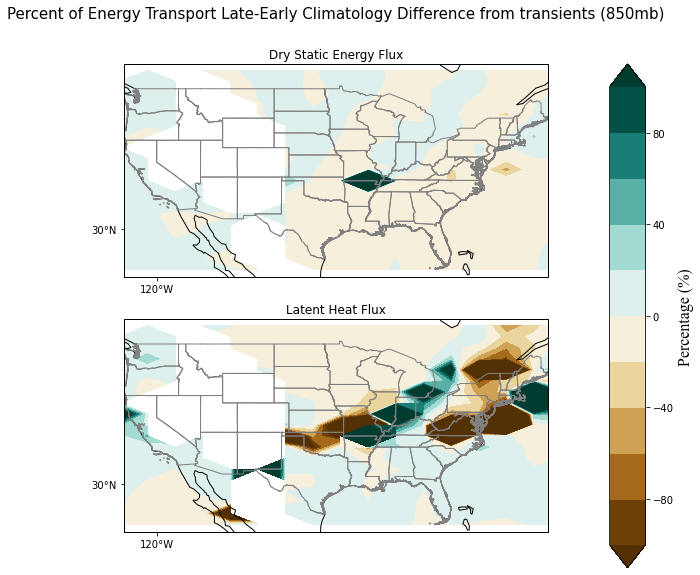

In [39]:
from matplotlib.pylab import *
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
titles=['Dry Static Energy Flux', 'Latent Heat Flux']
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
#diff850_trans
#dse_trans850_diff,lh_trans850_diff
#Loop over all of the seasons and plot
#for i in enumerate(climo_all):
for i in range(len(diff_etcs850)):
        # Select the season
    data=diff_etcs850[i]
        # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=perc_change_lh850['lon'])
    max_val=100
    increment=20
    clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
        # Contour plot
        #norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
        #                                      vmin=-1600000, vmax=1600000, base=10)
    cs=axs[i].contourf(lons,perc_change_lh850['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
    axs[i].set_title(titles[i])

        # Draw the coastines for each subplot
    axs[i].coastlines()
    axs[i].set_extent([-124.5,-66.8,23.486,49])
    axs[i].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar_ax = fig.add_axes([0.69, 0.2, 0.025, 0.7]) #left, bottom width, height
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'vertical', label='Percentage (%)',pad = 0.05)
# Draw the colorbar
text = cbar_ax.yaxis.label
font = matplotlib.font_manager.FontProperties(family='times new roman', style='normal', size=16)
text.set_font_properties(font)

# Draw the colorbar
#cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='difference (m^3/s^3)')
fig.tight_layout()
# Add a big title at the top
plt.suptitle('Percent of Energy Transport Late-Early Climatology Difference from transients (850mb)',fontsize=15)
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/revisions/850mb_percfromtransients.png')

## 300mb

In [18]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_total_early300.nc'
DS_dse_early300=xr.open_dataset(f)
dse_early300_tot=DS_dse_early300['__xarray_dataarray_variable__']
dse_early300_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[ -132800.33 ,  -113319.52 ,   -90994.32 , ..., -1325573.6  ,
        -1350640.4  , -1374724.5  ],
       [ -189677.16 ,  -170313.31 ,  -150923.3  , ..., -1278840.1  ,
        -1303560.6  , -1328143.6  ],
       [ -253960.52 ,  -233571.9  ,  -213113.17 , ..., -1228714.5  ,
        -1252528.5  , -1276167.2  ],
       ...,
       [  223350.1  ,   126920.4  ,    27216.303, ...,  1785080.5  ,
         1848056.1  ,  1881807.4  ],
       [  258478.27 ,   150831.56 ,    -4745.579, ...,  1752471.1  ,
         1823755.4  ,  1878139.   ],
       [  222974.56 ,    78253.98 ,   -86622.06 , ...,  1734359.1  ,
         1802643.1  ,  1865651.8  ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [19]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/dse_total_late300.nc'
DS_dse_late300=xr.open_dataset(f)
dse_late300_tot=DS_dse_late300['__xarray_dataarray_variable__']
dse_late300_tot

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[  -51295.875,   -16992.773,    20401.498, ..., -1432745.4  ,
        -1458294.   , -1486664.2  ],
       [ -113902.05 ,   -81242.89 ,   -45743.4  , ..., -1388065.   ,
        -1416513.1  , -1447461.2  ],
       [ -179503.58 ,  -146943.98 ,  -112869.02 , ..., -1338115.5  ,
        -1369685.   , -1403645.6  ],
       ...,
       [ -205187.92 ,  -282403.5  ,  -370150.1  , ...,  1811524.5  ,
         1888677.8  ,  1938353.   ],
       [ -167319.97 ,  -261860.7  ,  -404790.03 , ...,  1788223.1  ,
         1871276.4  ,  1937641.5  ],
       [ -193425.33 ,  -321396.3  ,  -468783.75 , ...,  1777101.5  ,
         1854513.9  ,  1926001.5  ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [20]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_early300.nc'
DS_sh_early=xr.open_dataset(f)
sh_early300_trans=DS_sh_early['__xarray_dataarray_variable__']
sh_early300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-611.638562,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [-572.736312, -610.558945, -607.914768, ..., -285.879704, -286.148724,
        -300.789782],
       [-540.009158, -569.551418, -548.913885, ..., -252.397331, -259.159732,
        -280.545363],
       ...,
       [ 308.25264 ,  222.098716,   64.117321, ..., 6350.260982, 6632.383245,
        6849.790211],
       [ 310.281202,  220.010962,   55.538151, ..., 5594.912475, 5859.65442 ,
        6072.48267 ],
       [ 381.2874  ,  304.53852 ,  164.550632, ..., 4921.034982, 5151.024405,
        5320.572488]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [21]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/geo_trans300_early.nc'
DS_geo_early=xr.open_dataset(f)
geo_early300_trans=DS_geo_early['__xarray_dataarray_variable__']
geo_early300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 2.339826e-07,  6.019253e-06, -3.792912e-06, ..., -1.589755e-06,
         0.000000e+00, -6.587026e-06],
       [ 1.905510e-06,  7.623835e-06, -1.583584e-06, ..., -1.002585e-07,
        -1.096763e-07, -3.555617e-06],
       [ 1.060750e-05,  5.636596e-06, -1.309703e-06, ..., -4.391499e-06,
        -5.096767e-06, -1.759247e-06]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...

In [28]:
dse_early300_trans=sh_early300_trans+geo_early300_trans
dse_early300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[ -380.68789483,  -107.43073168,   -92.8791531 ,   -34.03124131,
          -39.96376798,  -156.88151807,    35.62613507,   -72.22814177,
           93.00227266,   123.59450945,   -52.41175874,  -129.39652963,
           22.09323957,   179.51651792,    90.17712077,    40.47245859,
          -92.0395854 ,   -98.90268348,   -72.11070743],
       [ -207.7442995 ,    48.39317286,    18.18779213,    66.34534307,
          190.90885083,   232.56699949,   240.40142669,   250.77297901,
          368.95188014,   520.75154168,   359.59041972,   139.16971788,
          318.8421926 ,   454.93866493,   333.25937328,   106.43712697,
           72.63960452,   134.57162665,   142.33892956],
       [   84.8601282 ,   182.41297823,    69.69768367,   196.26702131,
          285.33600631,   343.22846674,   472.54211553,   510.02468265,
          646.64520103,   932.24690599,   856.26739742,   626.17893614,
          683.91347444,   929.02066567,   667.02114009,   410.31656194,
          307.70038632,   455.57924981,   465.6811361 ],
       [  359.64015282,   364.82432252,   419.00649421,   625.51472699,
          319.27470974,   692.39089259,   558.65743384,   953.48987794,
         1038.14440569,  1507.95087672,  1349.46204914,  1235.14381907,
         1215.70975783,  1263.55779511,  1059.93436043,   887.0545876 ,
          815.68355421,   924.63659783,   794.04671356],
...
       [ 1872.64022023,   341.50541716,  -209.63390156, -1062.94335664,
        -1278.92790235, -1658.52451634, -1843.10773745, -1364.96621158,
         -795.09056847,   527.04310127,  2145.82600981,  3369.50923612,
         4163.84060422,  4384.52041409,  4900.68455248,  5430.77799292,
         6576.46270474,  7640.5119645 ,  9042.76320438],
       [ 1665.02866728,    35.82503507,  -425.65136328,  -606.78769503,
        -1427.88061127, -2153.42965702, -2468.44784185, -1973.01237716,
         -880.02393408,   223.5181252 ,  1395.30790354,  2733.8198032 ,
         3491.52016433,  3912.60946511,  4395.40387074,  4469.38713173,
         6167.08177978,  6959.29694667,  8631.36576827],
       [ 1051.0601836 ,    27.32963436,  -505.66575766,  -690.06148269,
        -1503.99680477, -2376.14460713, -2665.56851472, -1900.05562733,
        -1010.20772151,   146.13596296,   961.38342878,  1753.88031343,
         2823.92384925,  3530.54754418,  3762.42328561,  3870.35774379,
         4853.89513509,  6044.53741155,  7278.14992032],
       [  876.74372261,  -361.44208537,  -635.34493267, -1184.05997266,
        -1779.50187494, -2487.74081208, -2665.14638103, -1953.18645381,
         -997.06439783,  -185.96813242,   519.11441907,  1236.30306921,
         2211.35711351,  2909.21939513,  3022.24544622,  3140.82910066,
         3941.65415444,  5090.21595872,  6251.54526666]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0

In [24]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_late300.nc'
DS_sh_late=xr.open_dataset(f)
sh_late300_trans=DS_sh_late['__xarray_dataarray_variable__']
sh_late300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ -878.410071,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [ -850.620998,  -787.659349,  -745.245052, ...,  -138.644585,
         -133.354152,  -164.524932],
       [ -776.51447 ,  -729.739257,  -681.149176, ...,  -140.530049,
         -147.692039,  -170.689333],
       ...,
       [ -963.0252  , -1082.124217, -1234.95187 , ...,  6401.787637,
         6411.507482,  6494.486375],
       [-1093.36782 , -1207.901567, -1349.294134, ...,  5715.820806,
         5742.804453,  5805.387965],
       [ -995.93134 , -1144.206801, -1396.358679, ...,  4942.151303,
         4978.098594,  5021.474113]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [25]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/geo_trans300_late.nc'
DS_geo_late=xr.open_dataset(f)
geo_late300_trans=DS_geo_late['__xarray_dataarray_variable__']
geo_late300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [-1.185721e-07, -2.255258e-06, -1.261406e-07, ...,  4.182734e-07,
         0.000000e+00, -8.774709e-07],
       [-8.938811e-07,  2.569765e-07,  1.593400e-06, ...,  5.307330e-09,
         8.417574e-10, -4.131614e-07],
       [-4.715953e-06,  1.066332e-06,  3.768268e-06, ..., -8.405937e-07,
        -4.628618e-07, -3.006581e-07]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...

In [27]:
dse_late300_trans=sh_late300_trans+geo_late300_trans
dse_late300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[-2.72960355e+02, -5.97089519e+01,  4.32950665e+01,
         3.66651980e+02,  5.23099056e+02,  3.96127532e+02,
         2.16741908e+02,  1.86468170e+02,  1.43025865e+02,
         2.14395339e+02,  1.03285118e+02,  1.94233569e+02,
         1.30704122e+02,  9.16344722e+01,  2.39969386e+01,
        -2.08173431e+01,  1.06637599e+01, -3.81770285e+01,
         5.96030763e+01],
       [ 1.18105668e+02,  2.47804829e+02,  2.68576380e+02,
         5.73220322e+02,  7.60028851e+02,  8.86893422e+02,
         6.70453178e+02,  5.57278072e+02,  5.60287654e+02,
         5.67007865e+02,  4.76218627e+02,  5.38443727e+02,
         3.33854844e+02,  2.72994517e+02,  1.05559919e+02,
         3.65450523e+01,  1.20936931e+02,  4.57158261e+01,
         2.23904677e+02],
       [ 4.12181946e+02,  4.34421164e+02,  5.31505893e+02,
         6.82114120e+02,  8.23058929e+02,  1.30053540e+03,
         1.23207795e+03,  1.09997889e+03,  1.13328830e+03,
         1.07785105e+03,  1.08835728e+03,  1.04043589e+03,
         8.80299300e+02,  7.16274315e+02,  4.70715003e+02,
         3.63819127e+02,  3.89664415e+02,  3.45043476e+02,
...
        -2.63647415e+03, -3.25193491e+03, -3.46517134e+03,
        -3.71897398e+03, -3.03735083e+03, -1.85044794e+03,
        -9.61854374e+01,  1.10432044e+03,  2.45330507e+03,
         3.60957166e+03,  4.11003644e+03,  4.67622109e+03,
         5.55827108e+03,  6.88762634e+03,  7.57291823e+03,
         8.58502209e+03],
       [-4.79744249e+02, -1.13364647e+03, -2.52756372e+03,
        -2.93476872e+03, -3.09458781e+03, -3.80339274e+03,
        -4.02404760e+03, -3.16265363e+03, -1.97347765e+03,
        -4.27194094e+02,  1.00781777e+03,  1.92196709e+03,
         2.83072667e+03,  3.22338024e+03,  3.73690443e+03,
         4.62700778e+03,  5.42960526e+03,  6.53160438e+03,
         7.40430705e+03],
       [-4.78673901e+02, -1.99192347e+03, -2.15841660e+03,
        -3.06273563e+03, -3.34714109e+03, -3.80872013e+03,
        -3.81020273e+03, -2.95373056e+03, -1.86652320e+03,
        -4.56079203e+02,  7.58928002e+02,  1.55846267e+03,
         2.23202691e+03,  2.64423492e+03,  2.80408728e+03,
         3.23911697e+03,  4.63396024e+03,  5.70738643e+03,
         6.59921107e+03]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0

In [29]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_total_early300.nc'
DS_lh_early300=xr.open_dataset(f)
lh_early300=DS_lh_early300['__xarray_dataarray_variable__']
lh_early300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[ -232.773222,  -199.439448,  -161.013334, ..., -2112.472551,
        -2139.215342, -2159.973561],
       [ -324.570438,  -292.298431,  -259.801344, ..., -2069.941474,
        -2097.44291 , -2124.670593],
       [ -424.186287,  -390.626018,  -357.112219, ..., -2018.156297,
        -2040.634392, -2069.293988],
       ...,
       [  157.320942,    88.466642,    18.534388, ...,   810.960081,
          839.62369 ,   877.029211],
       [  172.770768,    96.900425,    -2.949436, ...,   773.520686,
          812.717251,   847.197049],
       [  136.461908,    47.134793,   -51.920286, ...,   734.085753,
          773.180236,   813.02501 ]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [30]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_total_late300.nc'
DS_lh_late300=xr.open_dataset(f)
lh_late300=DS_lh_late300['__xarray_dataarray_variable__']
lh_late300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[  -87.387823,   -28.977518,    34.914861, ..., -2219.529487,
        -2252.419447, -2283.422989],
       [ -188.61335 ,  -134.840135,   -76.108234, ..., -2189.478625,
        -2222.600374, -2255.175931],
       [ -289.744072,  -237.644937,  -182.648444, ..., -2147.514131,
        -2182.430213, -2218.882265],
       ...,
       [ -146.94134 ,  -199.99577 ,  -255.811026, ...,   853.388155,
          890.579645,   939.794282],
       [ -114.145233,  -171.506283,  -255.738081, ...,   822.640805,
          868.864734,   913.303342],
       [ -120.708318,  -196.997416,  -285.229925, ...,   790.567109,
          835.075569,   880.977466]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [31]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_early300.nc'
DS_lh_earlytrans=xr.open_dataset(f)
lh_early300_trans=DS_lh_earlytrans['__xarray_dataarray_variable__']
lh_early300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[291.981766,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [286.033733, 294.307966, 296.899983, ..., 126.434811, 131.430659,
        138.835714],
       [287.669242, 293.810717, 295.002122, ..., 136.97748 , 140.785574,
        150.448351],
       ...,
       [ 52.946671,  56.906704,  60.28643 , ..., 153.286962, 156.228477,
        162.250056],
       [ 57.160909,  59.865355,  60.58346 , ..., 147.996255, 150.460981,
        153.302805],
       [ 60.998245,  58.367163,  54.584611, ..., 147.748467, 148.36813 ,
        148.984873]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [32]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_late300.nc'
DS_lh_latetrans=xr.open_dataset(f)
lh_late300_trans=DS_lh_latetrans['__xarray_dataarray_variable__']
lh_late300_trans

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[385.091324,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [369.14233 , 369.037292, 365.398429, ..., 116.705706, 120.521466,
        123.866184],
       [377.850308, 372.505668, 368.967263, ..., 131.599323, 138.160887,
        145.402848],
       ...,
       [ 29.401225,  27.354995,  24.41517 , ..., 211.172997, 209.053016,
        205.675115],
       [ 34.735626,  33.563375,  29.862889, ..., 196.9148  , 199.211144,
        200.446819],
       [ 36.896742,  33.526018,  28.393121, ..., 186.164416, 189.812705,
        198.659078]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [33]:
early_ratio_dse300=dse_early300_trans/dse_early300_tot
late_ratio_dse300=dse_late300_trans/dse_late300_tot
perc_change_dse300=(late_ratio_dse300-early_ratio_dse300)*100
perc_change_dse300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[-1.75630716e+00,  7.47327969e-02,  3.15897149e-02,
         4.76815087e-02,  4.72056306e-02,  3.65140272e-02,
         1.02814551e-02,  1.65934477e-02,  2.43517537e-03,
         5.71092819e-03,  1.55358117e-02,  4.17283672e-02,
         2.40280493e-02, -3.08452417e-02,  4.30209966e-02,
         1.04026069e-02, -1.17391939e-02, -5.43894630e-03,
        -9.60002308e-03],
       [-1.39227815e-01,  1.10081224e+00,  7.82123498e-02,
         7.02902203e-02,  4.78928232e-02,  4.23089728e-02,
         2.37860238e-02,  1.66237340e-02,  9.11835875e-03,
        -1.24233034e-03,  6.67762334e-03,  3.97237796e-02,
         5.47555099e-04, -6.69718567e-02,  1.14709321e+00,
         2.15487546e-02, -5.35738719e-03,  9.34650890e-03,
        -5.30698207e-03],
       [-8.41936001e-02, -1.30427855e-01,  1.22984631e+00,
         7.08010201e-02,  4.99224763e-02,  6.98338490e-02,
         4.46368726e-02,  3.35264869e-02,  2.57396792e-02,
         1.05518141e-03,  9.01617690e-03,  2.89061359e-02,
         2.24681749e-02, -5.40396964e-02,  5.50054304e-02,
         1.27278074e-01, -7.06863039e-03,  1.92594528e-02,
...
         7.86267394e-02,  6.39003907e-02,  4.22528445e-02,
         4.07284250e-02,  4.28956411e-02,  4.95466726e-02,
         2.01903255e-02,  1.21614360e-02, -1.36998457e-01,
        -2.41397447e+00,  8.36918516e+00, -6.42895432e-01,
         7.69500552e-02,  5.90145388e-02,  5.30831375e-02,
         8.06027717e-04],
       [-1.39739341e+01,  9.23716325e-02,  1.01719193e-01,
         8.78229029e-02,  5.36462237e-02,  4.55248323e-02,
         4.29482999e-02,  4.74265778e-02,  4.54321183e-02,
         3.33461356e-02, -1.45607301e-02, -1.08075601e-01,
        -9.14733187e-01,  4.59908408e+00, -1.20516278e+00,
        -2.43812108e-03,  2.71779394e-02,  3.16644487e-02,
         3.59579842e-03],
       [ 1.11425803e+00,  1.20584416e-01,  7.09178501e-02,
         7.18482221e-02,  5.28251132e-02,  4.11974842e-02,
         3.49932836e-02,  3.52768469e-02,  3.87907084e-02,
         1.57128170e-02, -2.45539532e-02, -8.90192859e-02,
        -5.07080302e-01,  3.59165192e+00, -1.13683172e+00,
        -1.06640103e-01,  2.44271480e-02,  3.43111621e-02,
         1.08941291e-02]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0

In [35]:
early_ratio_lh300=lh_early300_trans/lh_early300
late_ratio_lh300=lh_late300_trans/lh_late300
perc_change_lh300=(late_ratio_lh300-early_ratio_lh300)*100
perc_change_lh300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 19, lon: 19)>
array([[ 1.15233848e+03, -7.64736889e+01, -1.13875194e+01,
        -2.14399399e-01,  1.12334939e+00,  2.87185089e+00,
         3.72227253e-01,  8.20523588e-01,  2.30038185e+00,
         1.50169011e+00,  5.63161579e-01, -2.05398662e+00,
         2.34766380e-01,  2.45948377e+01,  1.34963131e+01,
         2.31601793e+00,  8.80342367e-01,  4.22811376e-02,
        -4.28190960e-01],
       [-6.11691463e+01,  1.06712384e+03, -2.71549030e+01,
        -6.60472623e+00, -3.00938623e+00,  1.81256515e+00,
         1.05912695e+00,  8.10025568e-01,  1.13861256e+00,
         2.14343370e+00,  1.82360757e+00, -2.57604447e+00,
        -2.60063606e+00,  4.15325702e-01,  2.64945625e+02,
         5.54146766e+00,  1.39897402e+00, -4.44659893e-01,
        -1.50164086e+00],
       [-2.35280010e+01, -4.19833958e+01,  7.74456998e+02,
        -2.75977817e+01, -2.99964516e+00,  1.56179567e+00,
         2.18351217e-01,  1.39358332e+00,  4.95808402e-01,
         7.04903206e-01,  1.42128801e+00, -5.40897248e-02,
        -1.08980405e+00, -9.31443874e-03,  3.76051481e+01,
         2.95738025e+01,  2.22681227e+00, -2.32812324e-02,
...
         3.43852741e+00,  2.51486577e+00,  2.21863156e+00,
         1.14953832e+00,  3.37022341e-01, -5.96722105e-01,
        -1.62537100e+00, -4.36564487e+00, -1.78649200e+01,
        -2.17291886e+02,  6.36092319e+02, -2.55669182e+01,
         1.38932073e+01,  1.22619904e+01,  7.04154716e+00,
         6.34624760e+00],
       [-9.78306439e+02,  7.36511391e+00,  4.41802424e+00,
         3.92249398e+00,  2.87501235e+00,  2.37838057e+00,
         1.04005293e+00,  9.08614745e-01,  9.27388530e-02,
        -6.98994440e-01, -3.04254935e+00, -8.95777703e+00,
        -9.38012093e+01,  3.94606636e+02, -6.10073141e+01,
         9.27558113e+00,  1.01500509e+01,  1.00948765e+01,
         6.64529691e+00],
       [ 9.14422575e+01,  6.57363585e+00,  4.99488588e+00,
         3.86588209e+00,  3.10990678e+00,  1.50916366e+00,
         1.51423781e+00,  9.55821707e-01,  1.25563958e+00,
         3.91967119e-01, -4.30024767e-01, -6.21129475e+00,
        -4.82115261e+01,  3.30364958e+02, -7.19493601e+01,
        -1.53991018e+00,  7.90274698e+00,  8.87457226e+00,
         7.20551593e+00]])
Coordinates:
  * lat           (lat) float64 24.5 26.0 27.5 29.0 30.5 ... 47.0 48.5 50.0 51.5
  * lon           (lon) float64 -125.0 -121.2 -117.5 ... -65.0 -61.25 -57.5
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0

In [37]:
perc_change300=[perc_change_dse300,perc_change_lh300]


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


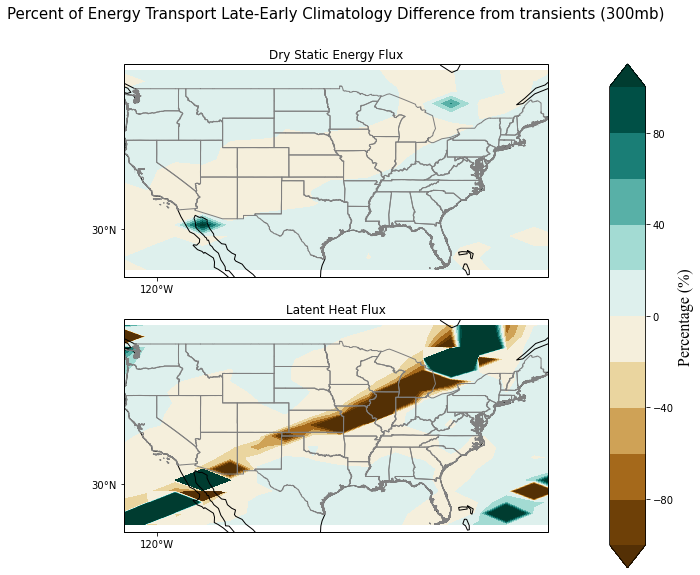

In [40]:
from matplotlib.pylab import *
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
titles=['Dry Static Energy Flux', 'Latent Heat Flux']
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
#diff850_trans
#dse_trans850_diff,lh_trans850_diff
#Loop over all of the seasons and plot
#for i in enumerate(climo_all):
for i in range(len(perc_change300)):
        # Select the season
    data=perc_change300[i]
        # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=perc_change_lh300['lon'])
    max_val=100
    increment=20
    clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
        # Contour plot
        #norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
        #                                      vmin=-1600000, vmax=1600000, base=10)
    cs=axs[i].contourf(lons,perc_change_lh300['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
    axs[i].set_title(titles[i])

        # Draw the coastines for each subplot
    axs[i].coastlines()
    axs[i].set_extent([-124.5,-66.8,23.486,49])
    axs[i].add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar_ax = fig.add_axes([0.69, 0.2, 0.025, 0.7]) #left, bottom width, height
cbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'vertical', label='Percentage (%)',pad = 0.05)
# Draw the colorbar
text = cbar_ax.yaxis.label
font = matplotlib.font_manager.FontProperties(family='times new roman', style='normal', size=16)
text.set_font_properties(font)

# Draw the colorbar
#cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='difference (m^3/s^3)')
fig.tight_layout()
# Add a big title at the top
plt.suptitle('Percent of Energy Transport Late-Early Climatology Difference from transients (300mb)',fontsize=15)
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/revisions/300mb_percfromtransients.png')